Your Name: Kieran Fitzmaurice

(Adapted from textbook exercise 10.9)

The Ising model is a theoretical model of a magnet. The magnetization of a magnetic material is made up of the combination of many small magnetic dipoles spread throughout the material. If these dipoles point in random directions then the overall magnetization of the system will be close to zero, but if they line up so that all or most of them point in the same direction then the system can acquire a macroscopic magnetic moment - it becomes magnetized.  The Ising model is a model of this process in which the individual moments are represented by dipoles or "spins" arranged on a grid or lattice:
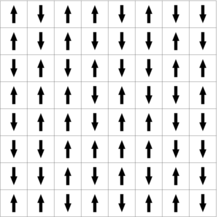

The spins themselves, in this simple model, are restricted to point in only two directions, up and down. Mathematically the spins are represented by variables $s_i=\pm1$ on the points of the lattice, $+1$ for up-pointing
spins and $-1$ for down-pointing ones.  Dipoles in real magnets can typically point in any spatial direction, not just up or down, but the Ising model, with its restriction to just the two directions, captures a lot of the important physics while being significantly simpler to understand.

Another important feature of many magnetic materials is that the individual dipoles in the material may interact magnetically in such a way that it is energetically favorable for them to line up in the same direction.  The
magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_is_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_is_j$, where $J$ is a positive interaction constant, which we will set equal to 1 for simplicity. The minus sign ensures that the interactions are *ferromagnetic*, meaning the energy is lower when dipoles are lined up.  A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$E = -\sum_{<ij>} s_i s_j\,,$$
where the notation $<ij>$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edge of the lattice, which have either two or three neighbors.

Write a program to perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of $20\times20$ spins. You will need to set up variables to hold the value $\pm1$ of the spin on
each lattice site, probably using a two-dimensional integer array, and then take the following steps:

- First write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_ is_j$ from all of them, then multiply by $-1$.

    > Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-s_1 s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-s_2 s_1$. If you don't account for this effect, your energy will be off by a factor of two!
    
    > Hint 2: To make your final program run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once.  If you do the calculation step by step, your program will be significantly slower.



- Now use your function as the basis for a Metropolis-style simulation of the Ising model with temperature $T=1$ in units where the Boltzmann constant $k_B$ is also $1$. Initially set the spin variables randomly to $\pm1$, so that on average about a half of them are up and a half down, giving a total magnetization of roughly zero.  Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula,
$$P_{i\to j} = \Bigg\lbrace\begin{array}{ll}
           1 &\qquad\mbox{if $E_j \le E_i$,} \\
           \exp\big[-(E_j-E_i)/k_BT\big] &\qquad\mbox{if $E_j > E_i$.}
         \end{array}$$
If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spin. Now repeat this process for many moves.


- Use `imshow` to to produce an image of the final state of system after $100\,000$ Monte Carlo steps, using squares of two colors to represent the up and down spins. Next to it (using `subplot`) make a plot of the relative magnetization
$$M=\frac{1}{N}\sum_{i=1}^{N} s_i$$
at each Monte Carlo step. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization.
    >Hint 3: While you are working on your program, do shorter runs, of maybe $10\,000$ steps at a time. Once you have it working properly, do a longer run of $100\,000$ steps to get the final results.

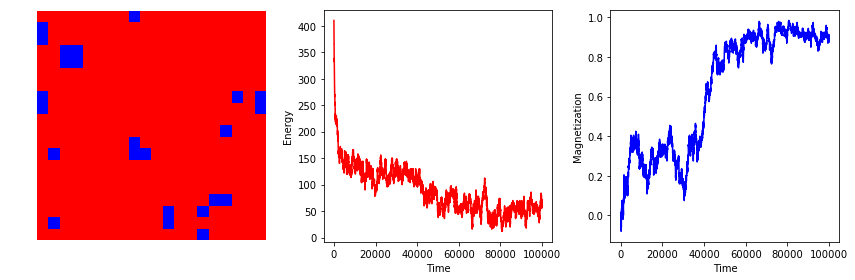

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def compute_energy(grid):
    below = np.roll(grid,1,axis = 0)
    above = np.roll(grid,-1,axis = 0)
    right = np.roll(grid,1,axis = 1)
    left = np.roll(grid,-1,axis = 1)
    
    neigh_above = grid*above
    neigh_below = grid*below
    neigh_right = grid*right
    neigh_left = grid*left
    
    #Unlike neighbors will have multiplied to -1
    
    nabove = (neigh_above == -1).sum() 
    nbelow = (neigh_below == -1).sum()
    nright = (neigh_right == -1).sum()
    nleft = (neigh_left == -1).sum()
    
    #Looking at number of unlike "bonds" between each pair,
    #so divide sum by 2
    
    E = (nabove + nbelow + nright + nleft)/2
    return(E)

def compute_magnet(grid):
    M = (grid == 1).sum() - (grid == -1).sum()
    M = M/(L**2)
    return(M)

def attempt_flip(grid,T):
    k = 1
    i,j = np.random.randint(L, size = 2)
    
    new_grid = np.copy(grid)
    new_grid[i][j] = grid[i][j]*-1 #flip
    
    Ei = compute_energy(grid)
    Ef = compute_energy(new_grid)
    
    dE = Ef - Ei
    
    if dE <= 0:
        P = 1
    else:
        P = np.exp(-1*dE/(k*T))
        
    num = np.random.rand()
    
    if(num < P):
        grid = new_grid #accept flip
        
    return(grid)

#Run Simulation

L = 20
timesteps = 100000
T = 1
k = 1

spin = [-1,1]
grid = np.random.choice(spin,(L,L))

E = np.zeros(timesteps)
M = np.zeros(timesteps)

for t in range(0,timesteps):
    
    E[t] = compute_energy(grid)
    M[t] = compute_magnet(grid)
    
    grid = attempt_flip(grid,T)

time = range(0,timesteps)

fig = plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(grid, cmap = "bwr")
plt.axis("scaled")
plt.axis("off")
plt.subplot(1,3,2)
plt.plot(time,E,'r-')
plt.xlabel("Time")
plt.ylabel("Energy")
plt.subplot(1,3,3)
plt.plot(time,M,'b-')
plt.xlabel("Time")
plt.ylabel("Magnetization")
plt.tight_layout()

plt.show()

Once your code works, modify it to produce an animation of the two graphs described above. Put your code into a function named `ising` that takes a value for $T$ and returns a `FuncAnimation`. Note that you can - and should - run several (say 100) Monte Carlo steps for each frame of the animation. Otherwise, it will take an unreasonably long time to run.

In [2]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def ising(T):
    t = 0
    L = 20
    timesteps = 100000

    spin = [-1,1]
    grid = np.random.choice(spin,(L,L))
    
    frames = 100

    E = []
    M = []
    
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(12,4))
    see_spins = ax[0].imshow(grid, cmap = "bwr")
    ax[0].axis("off")
    see_energy, = ax[1].plot([],"r-")
    see_magnet, = ax[2].plot([],"b-")
    ax[1].axis(xmin = 0, xmax = timesteps, ymin = 0, ymax = 500)
    ax[1].set_xlabel("Time")
    ax[1].set_ylabel("Energy")
    ax[2].axis(xmin = 0, xmax = timesteps, ymin = -1, ymax = 1)
    ax[2].set_xlabel("Time")
    ax[2].set_ylabel("Magnetization")
    plt.tight_layout()
    
    pass

    def animate(frame):
        grid = see_spins.get_array()
        
        E.append(compute_energy(grid))
        M.append(compute_magnet(grid))
        
        for n in range(0,1000):
            
            grid = attempt_flip(grid,T)

        see_spins.set_array(grid)
        see_energy.set_data(1000*np.arange(len(E)), E)
        see_magnet.set_data(1000*np.arange(len(M)), M)
        
        pass
    
    anim = FuncAnimation(fig, animate, frames=100, interval=200) #feel free to modify
    return anim

Use the cells below to run your function with temperature $T=1$ and observe the behavior of the system. Then run it two further times at temperatures $T=2$ and $T=3$. If you don't notice a difference between these runs, then something went wrong in your code.

In [3]:
#T = 1: becomes fully magnetized
anim = ising(1)
HTML(anim.to_html5_video())

In [4]:
#T = 2: becomes partially magnetized
anim = ising(2)
HTML(anim.to_html5_video())

In [5]:
#T = 3: no magnetization
anim = ising(3)
HTML(anim.to_html5_video())